### What does R-squared represent in a regression model?
R-squared (R²) represents the proportion of variance in the dependent variable explained by the independent variables in the model. It ranges from 0 to 1, where 1 indicates a perfect fit. However, a high R² does not necessarily mean the model is good, as it does not indicate causation.

### What are the assumptions of linear regression?
1. Linearity: The relationship between independent and dependent variables must be linear.
2. Independence: Observations must be independent of each other.
3. Homoscedasticity: Constant variance of residuals.
4. Normality: Residuals should be normally distributed.
5. No multicollinearity: Independent variables should not be highly correlated.

### What is the difference between R-squared and Adjusted R-squared?
R-squared measures how well the independent variables explain the variance in the dependent variable. Adjusted R-squared adjusts for the number of predictors in the model, preventing overestimation when adding irrelevant variables.

### Why do we use Mean Squared Error (MSE)?
MSE is used to measure the average squared differences between actual and predicted values. It penalizes larger errors more than smaller ones, providing a reliable metric for regression model accuracy.

### What does an Adjusted R-squared value of 0.85 indicate?
An Adjusted R-squared value of 0.85 suggests that 85% of the variance in the dependent variable is explained by the independent variables, accounting for the number of predictors used.

### How do we check for normality of residuals in linear regression?
1. Histogram: Check if residuals follow a normal distribution.
2. Q-Q Plot: A straight-line pattern confirms normality.
3. Shapiro-Wilk Test: A statistical test for normality.
4. Skewness & Kurtosis: Values near 0 indicate normality.

### What is multicollinearity, and how does it impact regression?
Multicollinearity occurs when independent variables are highly correlated, making it difficult to determine individual variable effects. It increases variance in regression coefficients and can lead to unreliable estimates. Variance Inflation Factor (VIF) helps detect multicollinearity.

### What is Mean Absolute Error (MAE)?
MAE measures the average absolute difference between actual and predicted values. Unlike MSE, it does not square errors, making it more interpretable but less sensitive to large errors.

### What are the benefits of using an ML pipeline?
1. Automates data preprocessing and model training.
2. Improves reproducibility and efficiency.
3. Reduces errors and manual intervention.
4. Ensures consistent preprocessing across datasets.

### Why is RMSE considered more interpretable than MSE?
Root Mean Squared Error (RMSE) is the square root of MSE, keeping the error metric in the same unit as the dependent variable. This makes it more interpretable than MSE, which uses squared values.

### What is pickling in Python, and how is it useful in ML?
Pickling serializes a Python object (e.g., an ML model) into a binary format for storage. It is useful for saving and reloading trained models, reducing the need for retraining every time.

### What does a high R-squared value mean?
A high R-squared value suggests that a large proportion of the variance in the dependent variable is explained by the model. However, it does not indicate causation or model accuracy.

### What happens if linear regression assumptions are violated?
Violating assumptions can lead to biased coefficients, incorrect p-values, and unreliable predictions. It is essential to check and address assumption violations for robust model performance.

### How can we address multicollinearity in regression?
1. Remove highly correlated variables.
2. Use Principal Component Analysis (PCA).
3. Apply Ridge or Lasso regression.
4. Use Variance Inflation Factor (VIF) to detect collinear variables.

### How can feature selection improve model performance in regression analysis?
Feature selection removes irrelevant or redundant variables, improving model accuracy, reducing overfitting, and enhancing interpretability. Techniques include Recursive Feature Elimination (RFE), Lasso regression, and correlation analysis.

### How is Adjusted R-squared calculated?
Adjusted R² = 1 - [(1 - R²) * (n - 1) / (n - k - 1)], where n is the number of observations and k is the number of predictors. It adjusts for the number of independent variables.

### Why is MSE sensitive to outliers?
MSE squares errors, making large errors more impactful. If an outlier exists, it significantly increases MSE, distorting the model's evaluation.

### What is the role of homoscedasticity in linear regression?
Homoscedasticity means that residuals have constant variance. If violated, predictions may be biased, making heteroscedasticity detection and correction crucial for reliable regression results.

### What is Root Mean Squared Error (RMSE)?
RMSE is the square root of MSE and provides an interpretable measure of prediction error in the same unit as the dependent variable.

### Why is pickling considered risky?
Pickled files may contain security risks if tampered with, as they can execute arbitrary code upon loading. Secure storage is essential when using pickling.

### What alternatives exist to pickling for saving ML models?
1. Joblib: More efficient for large NumPy arrays.
2. ONNX: Used for cross-platform ML model deployment.
3. TensorFlow SavedModel: Preferred for deep learning models.

### What is heteroscedasticity and why is it a problem?
Heteroscedasticity occurs when residuals have non-constant variance, leading to inefficient estimates and unreliable confidence intervals. Log transformations or weighted least squares regression can help mitigate it.

### What are interaction terms, and why is it a problem?
Interaction terms capture the combined effect of two or more independent variables on the dependent variable, improving model accuracy when interactions exist.

### How can interaction terms enhance a regression model’s predictive power?
They allow the model to capture dependencies between variables, making predictions more accurate when interactions influence the dependent variable.

#Practical Questions

Loading Dataset

In [32]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
diamonds = sns.load_dataset('diamonds')

1️ Visualizing the Distribution of Residuals

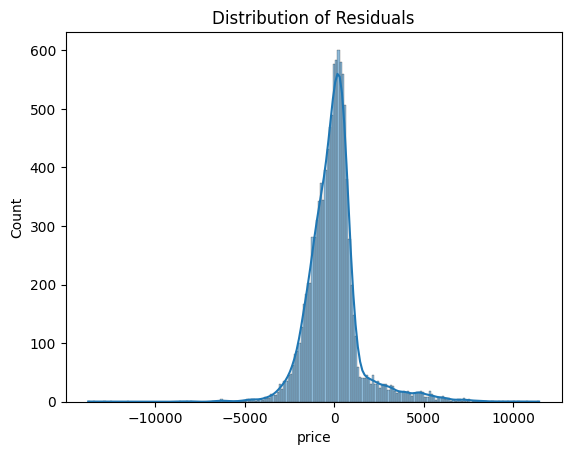

In [33]:
# Selecting features and target variable
X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting model
model = LinearRegression()
model.fit(X_train, y_train)

# Getting residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals distribution
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

2️ Calculating MSE, MAE, RMSE

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate errors
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MSE: 2333883.1792799835
MAE: 994.736665092202
RMSE: 1527.7052003838908


3️ Checking Regression Assumptions

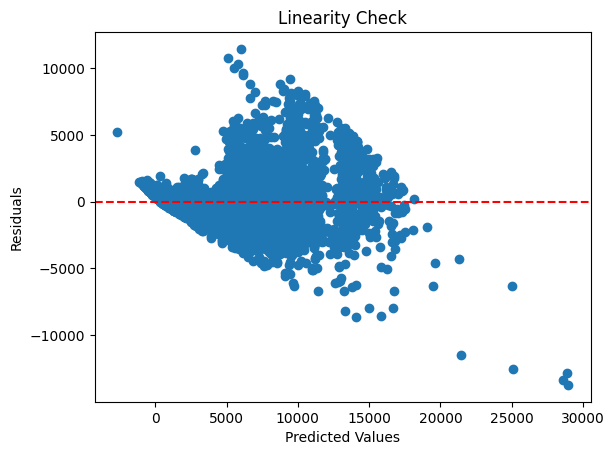

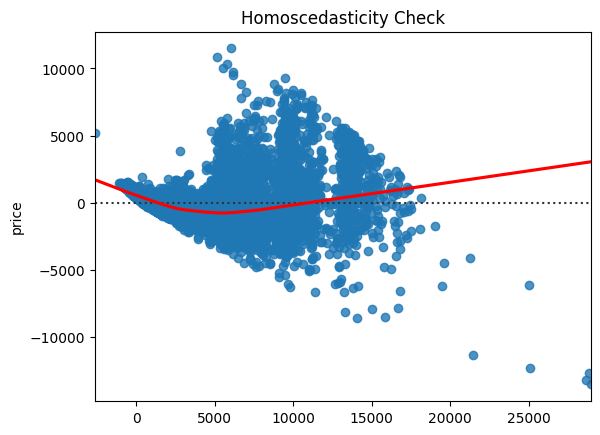

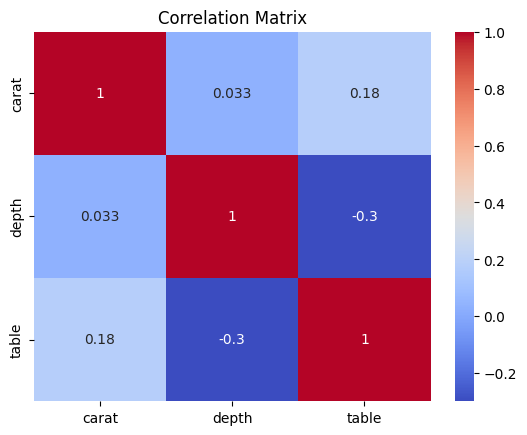

In [35]:
import scipy.stats as stats

# Linearity Check (Scatter plot)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Linearity Check")
plt.show()

# Homoscedasticity Check
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title("Homoscedasticity Check")
plt.show()

# Multicollinearity Check
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


4️ ML Pipeline with Feature Scaling

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Creating pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Fit and evaluate
pipeline.fit(X_train, y_train)
print("Pipeline R-squared:", pipeline.score(X_test, y_test))


Pipeline R-squared: 0.853185544894256


5️ Simple Linear Regression

In [37]:
# Coefficients and R-squared
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(X_test, y_test))


Intercept: 13056.321710255172
Coefficients: [7873.05329205 -150.40764283 -106.41813265]
R-squared: 0.853185544894256


6️ Linear Regression on Tips Dataset

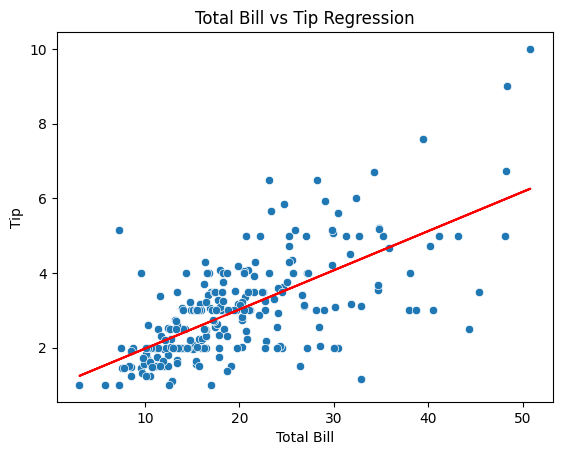

In [38]:
# Load dataset
tips = sns.load_dataset('tips')

# Define features and target
X_tips = tips[['total_bill']]
y_tips = tips['tip']

# Train model
model_tips = LinearRegression()
model_tips.fit(X_tips, y_tips)

# Predictions
y_tips_pred = model_tips.predict(X_tips)

# Plot
sns.scatterplot(x=tips['total_bill'], y=tips['tip'])
plt.plot(tips['total_bill'], y_tips_pred, color='red')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip Regression")
plt.show()


7️ Linear Regression on Synthetic Data

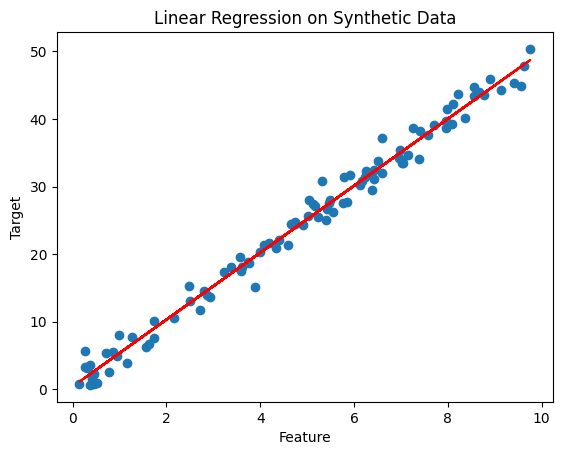

In [39]:
import numpy as np

# Generate synthetic data
X_syn = np.random.rand(100, 1) * 10
y_syn = 5 * X_syn + np.random.randn(100, 1) * 2

# Train model
model_syn = LinearRegression()
model_syn.fit(X_syn, y_syn)

# Predict and plot
y_syn_pred = model_syn.predict(X_syn)
plt.scatter(X_syn, y_syn)
plt.plot(X_syn, y_syn_pred, color='red')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression on Synthetic Data")
plt.show()


8️ Pickling a Model

In [40]:
import pickle

# Save model
with open('linear_regression.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load model
with open('linear_regression.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print("Loaded Model R-squared:", loaded_model.score(X_test, y_test))


Loaded Model R-squared: 0.853185544894256


9️ Polynomial Regression

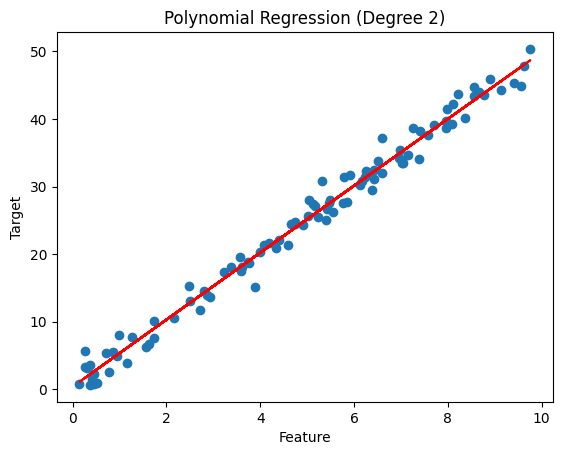

In [41]:
from sklearn.preprocessing import PolynomialFeatures

# Transform features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_syn)

# Train model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_syn)

# Predict and plot
y_poly_pred = poly_model.predict(X_poly)
plt.scatter(X_syn, y_syn)
plt.plot(X_syn, y_poly_pred, color='red')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Polynomial Regression (Degree 2)")
plt.show()


10 Generate Synthetic Data for Simple Regression

In [42]:
# Generating random data
X_rand = np.random.rand(100, 1) * 10
y_rand = 3 * X_rand + np.random.randn(100, 1) * 2

# Fitting model
rand_model = LinearRegression()
rand_model.fit(X_rand, y_rand)

print("Coefficient:", rand_model.coef_)
print("Intercept:", rand_model.intercept_)


Coefficient: [[3.09882158]]
Intercept: [-0.83920785]


1️1️ Comparing Polynomial Models

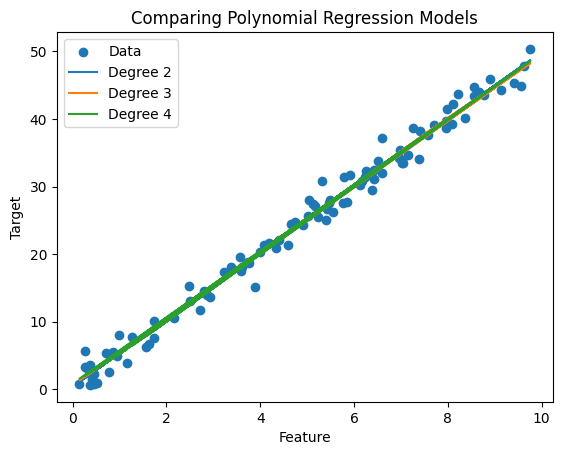

In [43]:
# Fit polynomial models of different degrees
degrees = [2, 3, 4]
plt.scatter(X_syn, y_syn, label="Data")

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_syn)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y_syn)
    y_poly_pred = poly_model.predict(X_poly)
    plt.plot(X_syn, y_poly_pred, label=f"Degree {d}")

plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.title("Comparing Polynomial Regression Models")
plt.show()


1️2️ Simple Linear Regression with Two Features

In [44]:
# Generating dataset
X_multi = np.random.rand(100, 2) * 10
y_multi = 2 * X_multi[:, 0] + 3 * X_multi[:, 1] + np.random.randn(100) * 2

# Train model
multi_model = LinearRegression()
multi_model.fit(X_multi, y_multi)

# Print details
print("Intercept:", multi_model.intercept_)
print("Coefficients:", multi_model.coef_)
print("R-squared:", multi_model.score(X_multi, y_multi))


Intercept: 0.21312950807029907
Coefficients: [2.06295805 2.91971724]
R-squared: 0.966746696368876


1️3️ Visualizing Linear Regression Line

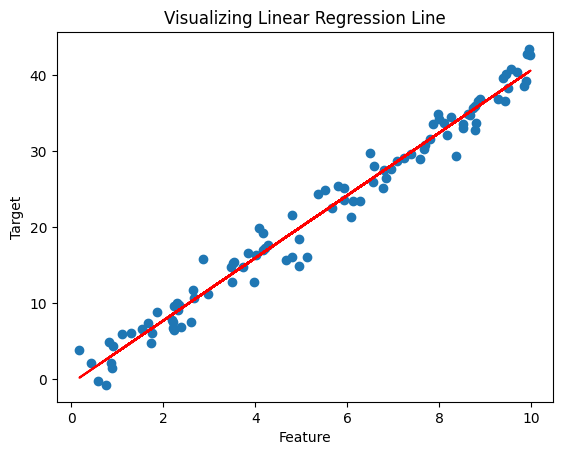

In [45]:
# Generating synthetic data
X_vis = np.random.rand(100, 1) * 10
y_vis = 4 * X_vis + np.random.randn(100, 1) * 2

# Train model
vis_model = LinearRegression()
vis_model.fit(X_vis, y_vis)

# Predict and plot
y_vis_pred = vis_model.predict(X_vis)
plt.scatter(X_vis, y_vis)
plt.plot(X_vis, y_vis_pred, color='red')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Visualizing Linear Regression Line")
plt.show()


14. Check for Multicollinearity using Variance Inflation Factor (VIF)

In [46]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression

# Generate synthetic dataset
X, _ = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data)


     Feature       VIF
0  Feature_1  1.019320
1  Feature_2  1.012651
2  Feature_3  1.059337
3  Feature_4  1.046592
4  Feature_5  1.020596


15. Polynomial Regression (Degree 4)

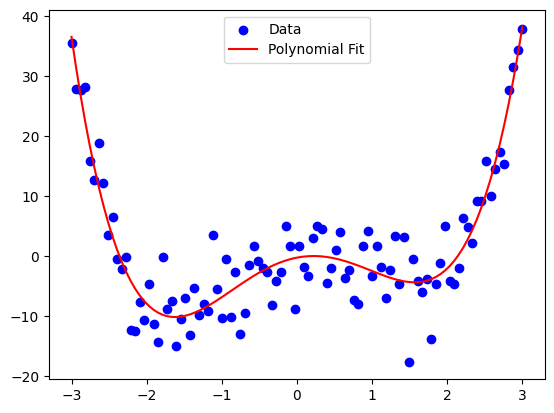

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**4 - 5*X**2 + X + np.random.randn(*X.shape) * 5

# Transform features for polynomial regression
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict and plot
y_pred = model.predict(X_poly)
plt.scatter(X, y, color='blue', label="Data")
plt.plot(X, y_pred, color='red', label="Polynomial Fit")
plt.legend()
plt.show()


16. Machine Learning Pipeline with Standardization

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate dataset
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Train model
pipeline.fit(X, y)
print("R-squared score:", pipeline.score(X, y))


R-squared score: 0.9955395169111729


17. Polynomial Regression (Degree 3)

In [49]:
# (Same as question 15, change degree=3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)


18. Multiple Linear Regression with 5 Features

In [50]:
from sklearn.linear_model import LinearRegression

# Generate dataset
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Train model
model = LinearRegression()
model.fit(X, y)

print("R-squared score:", model.score(X, y))
print("Coefficients:", model.coef_)


R-squared score: 0.9955395169111729
Coefficients: [61.83002653 98.93196386 61.31053663 54.99112667 35.59006051]


19. Linear Regression with Visualization

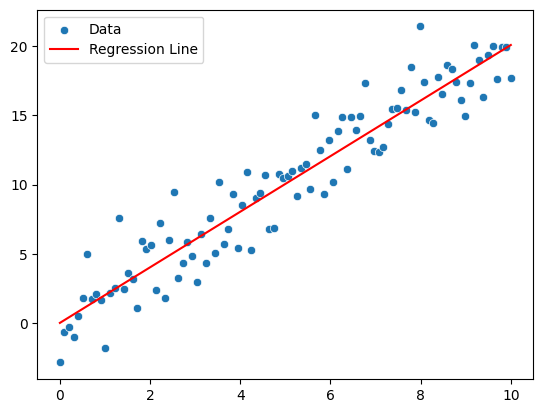

In [51]:
import seaborn as sns

# Generate dataset
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2*X + np.random.randn(100, 1) * 2

# Train model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
sns.scatterplot(x=X.flatten(), y=y.flatten(), label="Data")
plt.plot(X, y_pred, color='red', label="Regression Line")
plt.legend()
plt.show()


20. Multiple Linear Regression with 3 Features

In [52]:
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)
model = LinearRegression().fit(X, y)
print("R-squared score:", model.score(X, y))
print("Coefficients:", model.coef_)


R-squared score: 0.9854985450036718
Coefficients: [28.3172211  73.99152663 18.79832083]


21. Serialize and Deserialize Model using Joblib

In [53]:
import joblib

# Save model
joblib.dump(model, "linear_model.pkl")

# Load model
loaded_model = joblib.load("linear_model.pkl")
print("Loaded Model R-squared:", loaded_model.score(X, y))


Loaded Model R-squared: 0.9854985450036718


22. Linear Regression with Categorical Variables (Seaborn tips Dataset)

In [54]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load dataset
tips = sns.load_dataset("tips")
X = tips[['total_bill', 'sex']]
y = tips['tip']

# One-hot encode categorical feature
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex'])
], remainder='passthrough')

X_transformed = preprocessor.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_transformed, y)
print("R-squared score:", model.score(X_transformed, y))


R-squared score: 0.45669999534149974


23. Compare Ridge Regression and Linear Regression

In [55]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load dataset
tips = sns.load_dataset("tips")
X = tips[['total_bill', 'sex']]  # Feature variables
y = tips['tip']  # Target variable

# One-hot encoding for 'sex' column
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex'])
], remainder='passthrough')

X_transformed = preprocessor.fit_transform(X)  # Convert categorical data to numeric

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_transformed, y)

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_transformed, y)

# Compare R-squared scores
print("Linear Regression R-squared:", linear_model.score(X_transformed, y))
print("Ridge Regression R-squared:", ridge.score(X_transformed, y))


Linear Regression R-squared: 0.45669999534149974
Ridge Regression R-squared: 0.45669996564162707


24. Cross-Validation for Linear Regression

In [56]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

# Load dataset
tips = sns.load_dataset("tips")
X = tips[['total_bill', 'sex']]  # Feature variables
y = tips['tip']  # Target variable

# One-hot encoding for 'sex' column
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex'])
], remainder='passthrough')

X_transformed = preprocessor.fit_transform(X)  # Convert categorical data to numeric

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)

# Perform Cross-Validation
scores = cross_val_score(ridge, X_transformed, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean CV Score:", scores.mean())


Cross-validation scores: [0.54437879 0.61953484 0.46939836 0.23685624 0.40031172]
Mean CV Score: 0.4540959918217853


25. Compare Polynomial Regression Models

In [57]:
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

# Load dataset
tips = sns.load_dataset("tips")
X = tips[['total_bill', 'sex']]  # Feature variables
y = tips['tip']  # Target variable

# One-hot encoding for 'sex' column
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex'])
], remainder='passthrough')

X_transformed = preprocessor.fit_transform(X)  # Convert categorical data to numeric

# Polynomial Regression
degrees = [2, 3, 4]  # Testing different polynomial degrees
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_transformed)  # Transform features
    model = LinearRegression().fit(X_poly, y)  # Train model
    print(f"Degree {degree} R-squared:", model.score(X_poly, y))


Degree 2 R-squared: 0.45750752095215386
Degree 3 R-squared: 0.47838183263927725
Degree 4 R-squared: 0.509699816286924
